In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = 'D:\Downloads\Data Analytics\TASK 6'

In [3]:
df = pd.read_csv(os.path.join(path,'df_clean.csv'), index_col = False)

In [4]:
# I have noticed that there were 2 different columns that were either unnecessary or added by mistake
# So I've started by finishing cleaning those columns.
df1 = df.drop(columns =['Unnamed: 0','price categoryy'])

In [5]:
# Now the data is cleaned, and only the necessary information imported.
df1

,id,model year,manufacturer,model,cylinders,fuel,price,mileage,car conditions,transmission,car type,car colour,state,Date posted,mileage category,price category
0,7311936036,2017,mercedes-benz,amg g 63,8 cylinders,gas,990000,4085,clean,automatic,SUV,white,fl,24/04/2021,very low mileage,very expensive
1,7315966576,2019,unknown,f250 xlt crewcab,8 cylinders,gas,554900,25365,lien,automatic,pickup,white,mi,02/05/2021,low mileage,very expensive
2,7313051670,2016,unknown,Lambo Aventador SV Roadster,12 cylinders,gas,516999,9982,clean,automatic,convertible,white,fl,26/04/2021,very low mileage,very expensive
3,7303420900,2003,unknown,any and all,5 cylinders,diesel,400123,123321,clean,automatic,pickup,blue,pa,07/04/2021,high mileage,very expensive
4,7306488355,2020,ferrari,f8 tributo,8 cylinders,gas,349999,2800,clean,automatic,coupe,unknown,ca,13/04/2021,very low mileage,very expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325601,7302545770,2006,ford,f550,unknown,diesel,0,0,clean,other,other,white,il,06/04/2021,new,very cheap
325602,7302020815,2017,tesla,model 3,unknown,diesel,0,0,clean,automatic,sedan,unknown,tx,05/04/2021,new,very cheap
325603,7301605555,2019,lincoln,continental reserve automatic,unknown,gas,0,0,clean,automatic,sedan,blue,fl,04/04/2021,new,very cheap
325604,7301605525,2020,ford,f-150 lariat 4wd supercrew automatic,unknown,gas,0,0,clean,automatic,pickup,white,fl,04/04/2021,new,very cheap


### First let's pick the variables that we are going to use for correlation

In [6]:
df2 = df1.drop(columns =['id','model','car conditions','car colour','cylinders','mileage category','price category','Date posted','manufacturer','fuel','transmission','car type','state'])

In [7]:
df2

,model year,price,mileage
0,2017,990000,4085
1,2019,554900,25365
2,2016,516999,9982
3,2003,400123,123321
4,2020,349999,2800
...,...,...,...
325601,2006,0,0
325602,2017,0,0
325603,2019,0,0
325604,2020,0,0


In [8]:
# Now lets start conducting some reviews:
df2.corr()

,model year,price,mileage
model year,1.000000,0.306430,-0.381009
price,0.306430,1.000000,-0.444601
mileage,-0.381009,-0.444601,1.000000


### 6.2.3 Correlation matrix heatmap

Text(0.5, 1.0, 'Correlation Matrix')

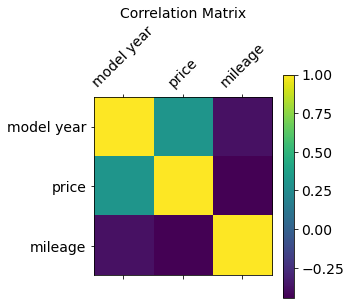

In [9]:
# And create a visualization for it, using a correlation matrix heatmap

f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(df2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### As we can see, these variables have a very weak relationship between them, as other variables that are not numeric have a strong influence in the data as well, for example, the type of car, location, car model and type.
This means that the year and mileage are not directly connected to the price alone.

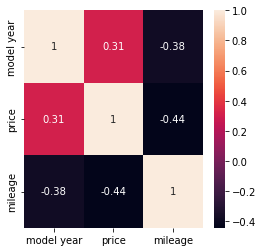

In [10]:
# To better visualize, let's add some numbers to the heat map using seaborn
f,ax = plt.subplots(figsize=(4,4))
corr = sns.heatmap(df2.corr(), annot = True, ax = ax)

#### Now it is possible to notice that the correlation is almost nule, in some cases it is even negative

### 6.2.4 Let's create a Scatterplot, to see if it can provide us with more insights

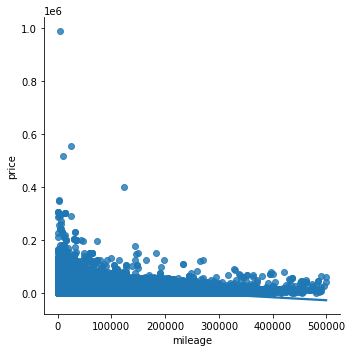

In [11]:
# Based on the "mileage" and "price" columns in seaborn

sns.lmplot(x = 'mileage', y = 'price', data = df2)

#### In this case we can notice that aside from a few cases where the cars are brand new or have a very low mileage, the relation between both are very weak. Meaning that the relation is higher when the mileage is lower, which make sense for car prices.

### 6.2.5 To try to find additional relation, let's create a pair plot.

In [12]:
pair_plot = df1[['model year','price','mileage']]

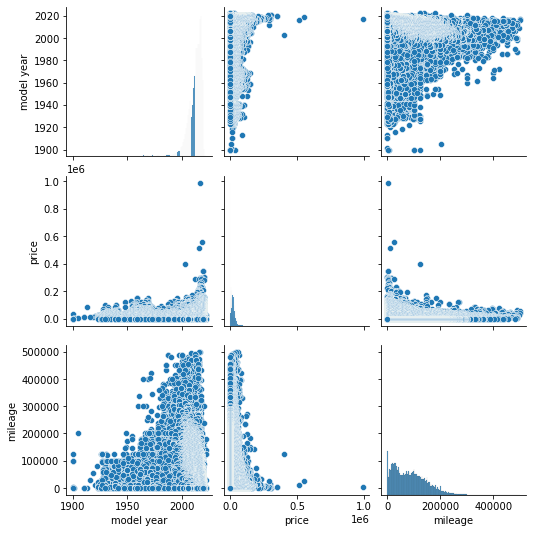

In [13]:
#It still does not work
pair_plot2 = sns.pairplot(pair_plot)

The information above make sense, but might case some confusion:
Newer cars, have higher prices, which makes sense.
However newer cars, should have a lower mileage, but it is hard to notice, because there are fewer older cars.

### 6.2.6 Categorical plot

<AxesSubplot:xlabel='price', ylabel='Count'>

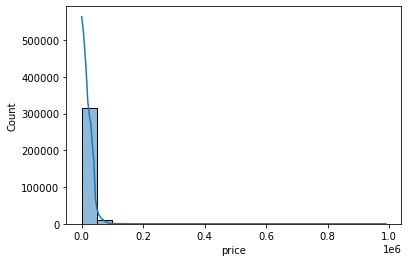

In [14]:
sns.histplot(pair_plot['price'], bins = 20, kde = True)

In [15]:
# Due to the low correlation, not much could be concluded from the categorical plot

### 6.2.7 Questions raised on 6.1

In [16]:
# What manufacturer has more cars available?
df1['manufacturer'].value_counts(dropna=False)

ford               51461
chevrolet          40321
toyota             27047
honda              16585
jeep               14561
nissan             14414
ram                14344
gmc                12639
bmw                12518
dodge              10116
unknown             9722
mercedes-benz       9713
hyundai             8141
volkswagen          7677
subaru              7281
lexus               6911
audi                6667
kia                 6614
cadillac            5483
acura               5302
chrysler            4438
mazda               4391
buick               4251
infiniti            4172
lincoln             3406
mitsubishi          2688
volvo               2678
mini                2054
rover               1752
jaguar              1687
pontiac             1468
porsche             1024
mercury              875
alfa-romeo           827
tesla                790
saturn               692
fiat                 655
ferrari               85
harley-davidson       82
datsun                35


As we can see, Henry Ford has kept his legacy in the USA, and even today, most cars available are Ford
Followed right after by Chevrolet, and in third place an outsider, Toyota.

In [17]:
# Which state has more cars available?
df1['state'].value_counts(dropna=False)

ca    39713
fl    22251
tx    16587
ny    15417
oh    14128
or    13798
nc    11351
pa    11128
wa    11094
mi    10667
va     8999
co     8433
tn     8390
wi     8292
id     7495
il     7336
nj     7109
az     6818
ma     6535
ia     5825
ga     5553
mn     5375
ok     4871
mt     4855
sc     4716
ks     4679
in     4385
ct     4130
md     4013
al     3571
ky     3416
mo     3291
nm     3229
ak     3079
nv     2592
dc     2549
ar     2492
nh     2222
la     2137
hi     2021
me     1903
vt     1886
ri     1757
ut      961
wv      907
sd      847
ne      686
de      665
ms      650
wy      455
nd      347
Name: state, dtype: int64

A bit different from the order of states with more population, the list of more car offers are: California, followed by Florida, then Texas, New York and Ohio.

In [18]:
# What fuel type is more popular?
df1['fuel'].value_counts(dropna=False)

gas         271063
other        28190
diesel       20600
hybrid        4258
electric      1495
Name: fuel, dtype: int64

The vast majority of cars are petrol (gas), followed by other, which may include alternative fuels or undecleared fuel type.
Not surprisingly hybrid and electric cars are "new" and there are fewer options available. Which raised one question:

In [19]:
# Which state has more electric and hybrid vehicles?
reg_fuel = pd.crosstab(df1['state'], df1['fuel'], dropna=False)
reg_fuel

fuel,diesel,electric,gas,hybrid,other
state,,,,,
ak,176,23,2688,35,157
al,182,13,2912,38,426
ar,174,10,1732,25,551
az,405,51,5233,115,1014
ca,2091,297,33362,886,3077
co,577,34,6963,129,730
ct,144,14,3482,41,449
dc,66,16,2187,56,224
de,68,3,550,5,39


And the order in this case remains almost the same, California, Florida, Texas, New York and Oregon.

In [20]:
# Which car types are more popular? Is it different in across different states?
mp_car_reg = pd.crosstab(df1['state'], df1['car type'], dropna=False).sort_index()
mp_car_reg

car type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
state,,,,,,,,,,,,,
ak,953,1,29,77,74,66,13,73,391,757,458,47,140
al,829,26,79,198,168,33,5,253,564,935,301,103,77
ar,467,4,87,135,198,27,6,212,533,482,236,67,38
az,1247,5,172,407,413,82,36,768,1212,1681,456,165,174
ca,8118,30,1048,2472,2521,415,123,2709,4602,12228,3131,1064,1252
co,2387,16,112,362,407,66,26,514,1276,1968,720,182,397
ct,748,2,115,213,299,56,8,614,557,1084,166,86,182
dc,473,3,71,167,151,45,2,229,228,878,76,86,140
de,131,1,21,44,23,12,1,23,78,213,84,8,26


It is possible to notice in this case that there are indeed some car preferences across states.
As we can imagine and see, a state like Alaska has a smaller percentage of convertible cars in relation to another state that is usually hotter, like Arizona for example. This repeats itself across other states, but a better visualization will be made using tableau.

In [21]:
# Is there are relation between car prices and mileage?
# This one was answered at 6.2.4, where we found out that there is a weak relation between those.

In [22]:
# Are most cars new or old?
df1['mileage category'].value_counts(dropna=False)

high mileage         110055
low mileage           89957
decent mileage        87631
very low mileage      17076
very high mileage     15513
new                    5374
Name: mileage category, dtype: int64

As we can see, most cars have a high mileage, followed by cars with a low mileage.
Not surprisingly, new cars have less offer as the website is to sell used cars mostly.

In [23]:
# What is the average price of cars defined by region, type, fuel and transmission type?

In [24]:
df1.groupby('state').agg({'price': ['mean', 'min', 'max','sum','count']})

price                              
               mean min     max        sum  count
state                                            
ak     24328.925950   0  145000   74908763   3079
al     20796.119294   0  140000   74262942   3571
ar     19793.008026   0  163540   49324176   2492
az     20914.055588   0  239995  142592031   6818
ca     17026.121043   0  349999  676158345  39713
co     18942.689909   0  150000  159743704   8433
ct     16117.908475   0  106999   66566962   4130
dc     15186.755983   0  304995   38711041   2549
de     17886.774436   0  150000   11894705    665
fl     18715.699160   0  990000  416443022  22251
ga     19817.332433   0  155000  110045647   5553
hi     19218.486393   0  289995   38840561   2021
ia     15222.941459   0  179995   88673634   5825
id     20469.946097   0  144995  153422246   7495
il     16672.112595   0  163540  122306618   7336
in     20251.002965   0  167500   88800648   4385
ks     18792.321222   0  163540   87929271   4679
ky     20251.564110   0  123456   69179343   3416
la     20058.105288   0  299991   42864171   2137
ma     16971.257230   0  139950  110907166   6535
md     18000.014702   0  209995   72234059   4013
me     15732.510772   0  175000   29938968   1903
mi     17954.245242   0  554900  191517934  10667
mn     16825.585860   0   85999   90437524   5375
mo     20814.344272   0  299500   68500007   3291
ms     17419.998462   0   98750   11322999    650
mt     23546.485479   0  163540  114318187   4855
nc     16676.964849   0  139950  189300228  11351
nd     17194.123919   0   82950    5966361    347
ne     18723.947522   0  124900   12844628    686
nh     17110.620162   0  129995   38019798   2222
nj     14230.777465   0  149995  101166597   7109
nm     18876.997213   0  163540   60953824   3229
nv     20390.901620   0  163540   52853217   2592
ny     18757.615425   0  261895  289186157  15417
oh     16357.042894   0  159991  231092302  14128
ok     17385.845001   0  299991   84686451   4871
or     15922.771126   0  299500  219702396  13798
pa     16371.854421   0  400123  182185996  11128
ri     18784.424587   0   69990   33004234   1757
sc     19400.491942   0  117995   91492720   4716
sd     18547.264463   0  105000   15709533    847
tn     20351.151013   0  299500  170746157   8390
tx     21125.838789   0  299991  350414288  16587
ut     25931.899063   0  160000   24920555    961
va     14279.324925   0  304995  128499645   8999
vt     17174.819194   0   85867   32391709   1886
wa     24050.099153   0  239900  266811800  11094
wi     17392.865171   0  299500  144221638   8292
wv     25888.754135   0  163540   23481100    907
wy     21318.571429   0   65995    9699950    455

In [25]:
df1.groupby('car type').agg({'price': ['mean', 'min', 'max','sum','count']})

price                               
                     mean min     max         sum  count
car type                                                
SUV          16047.911106   0  990000  1205567226  75123
bus          14055.441815   0  125000     7126109    507
convertible  20025.167587   0  516999   152351475   7608
coupe        21913.325001   0  349999   412912783  18843
hatchback    14476.056128   0   98995   237277036  16391
mini-van      9201.750955   0   79900    43340247   4710
offroad      15903.118136   0   95000     9557774    601
other        25231.494528   0  239900   534907684  21200
pickup       27153.966067   0  554900  1141932889  42054
sedan        13090.705038   0  269950  1110589234  84838
truck        23553.968462   0  200000   822269039  34910
van          17196.268434   0  290000   142729028   8300
wagon        13367.116624   0  199999   140635434  10521

In [26]:
df1.groupby('fuel').agg({'price': ['mean', 'min', 'max','sum','count']})

price                                
                  mean min     max         sum   count
fuel                                                  
diesel    29343.859320   0  400123   604483502   20600
electric  25056.050167   0  130000    37458795    1495
gas       16621.678340   0  990000  4505521996  271063
hybrid    15229.180132   0   90000    64845849    4258
other     26565.655055   0  239900   748885816   28190

In [27]:
df1.groupby('transmission').agg({'price': ['mean', 'min', 'max','sum','count']})

price                                
                      mean min     max         sum   count
transmission                                              
automatic     16206.905746   0  990000  4011419862  247513
manual        14267.941645   0  289995   243525228   17068
other         27959.866743   0  225995  1706250868   61025

The data above can allow us to have a lot of useful information.
We noticed that, some states have a higher average car price.
The average price of pickup are the highest, while mini van is the lowest.
Surprisingly, diesel cars on average are more expensive.
And, lastly, automatic cars are more expensive as well.

### 6.2.8 Define Hypotheses

I'll keep my original hypotheses.
## Some states across the USA have different car preferences (SUV, Pickup, Hactback,…), then not all cars sells equally in all regions.
This will help us to determine which type of car we should focus on selling in each region.

In [28]:
# Exporting both data frames to csv
df1.to_csv(os.path.join(path,'df_clean2.csv'))
df2.to_csv(os.path.join(path,'df_correlation.csv'))